## Libraries

In [2]:
# libraries
import numpy as np
import matplotlib.pylab as plt
import scipy.constants as cs

## Semiconductor data

In [11]:
# data for several semiconductors
data = {'Si':{'Eg':1.14,'m_c':0.36,'m_v':0.81},
        'Ge':{'Eg':0.67,'m_c':0.55,'m_v':0.37},
        'GaN':{'Eg':3.34,'m_c':0.2,'m_v':1.4},
        'GaP':{'Eg':2.26,'m_c':0.79,'m_v':0.83},
        'GaAs':{'Eg':1.42,'m_c':0.067,'m_v':0.45},
        'CdS':{'Eg':2.42,'m_c':0.18,'m_v':0.53},
        'CdSe':{'Eg':1.74,'m_c':0.13,'m_v':0.3},
        'CdTe':{'Eg':1.49,'m_c':0.11,'m_v':0.35},
        'ZnSe':{'Eg':2.7,'m_c':0.17,'m_v':1.44},
        'ZnS':{'Eg':3.54,'m_c':0.28,'m_v':1.40},
        'ZnO':{'Eg':3.37,'m_c':0.29,'m_v':1.21},}
T = 300 # temperature in kelvin
v_T = np.linspace(300,800,1000)

In [12]:
def n_i(Element,T=300):
    """
    Calculates the intrinsic carrier concentration in a semiconductor.

    This function calculates the intrinsic carrier concentration (n_i) in a 
    semiconductor material based on its element symbol and temperature.

    Args:
        Element (str): Symbol of the semiconductor element.
        T (float, optional): Temperature of the semiconductor in Kelvin. 
            Defaults to 300 K.

    Returns:
        float: Intrinsic carrier concentration (n_i) in cm^-3.

    Raises:
        KeyError: If the provided element symbol is not found in the 
                 data dictionary.

    Uses constants from the 'scipy.constants' (cs) module:
        * k_B: Boltzmann constant
        * e: Elementary charge
        * m_e: Electron mass
        * hbar: Reduced Planck constant
    """

    # physical constants
    k_B = cs.Boltzmann
    e = cs.elementary_charge
    m_e = cs.electron_mass
    hbar = cs.hbar
    
    # semiconductor params
    E_g = data[Element]['Eg']*e
    m_c = m_e * data[Element]['m_c']
    m_v = m_e * data[Element]['m_v']

    N_c = 0.25*((2 * m_c * k_B * T)/(np.pi*hbar**2))**(3.0/2.0)
    P_v = 0.25*((2 * m_v * k_B * T)/(np.pi*hbar**2))**(3.0/2.0)

    n_i = np.sqrt(N_c*P_v)*np.exp(-E_g/(2.0*k_B*T))/1e6

    return n_i

In [13]:
"{:.2E}".format(n_i('Si'))

'2.65E+09'

In [14]:
v_ni = np.array([n_i('Si',T) for T in v_T])

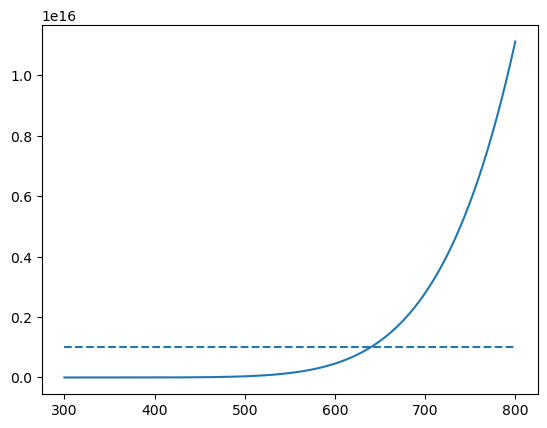

In [22]:
plt.plot(v_T,v_ni,label='Intrinsic Carriers')
plt.hlines(1e15,300,800,linestyle='dashed',label='Donors 0.1 ppm')